# Data analysis for our study on the transparency and open science standards in the policies of medical and health science journals

The protocol and details of our study is openly availble via the OSF [here](https://osf.io/h2xud/).

In [1]:
# import libraries required for analysis 
import numpy as np 
import pandas as pd
from pylab import savefig
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# import data 
df1=pd.read_csv("TOP_medj_totals.csv",thousands=',')
df1.head()

,Journal,year,Data citation,Data transparency,Code transparency,Materials transparency,Design & analysis,Study prereg,Analysis prereg,Replication,TOP signatory,Reg reports,OS badges,COI1,COI2,COI3,COI4
0,Blood,2020,0,2,0,2,0,0,0,0,0,0,0,1,1,1,1
1,Blood,2021,0,2,0,2,0,0,0,0,0,0,0,1,1,1,1
2,BMJ,2020,0,1,0,0,2,1,0,0,1,0,0,1,1,1,1
3,BMJ,2021,0,1,0,0,2,1,0,0,1,0,0,1,1,1,1
4,Cell,2020,2,2,3,1,2,1,1,1,1,0,0,1,1,1,0


In [3]:
# adding new columns to prepare for analysis - summing total score 
sum_total = df1['Data citation'] + df1['Data transparency'] + df1['Code transparency'] + df1['Materials transparency'] + df1['Design & analysis'] + df1['Study prereg'] + df1['Analysis prereg'] + df1['Replication'] + df1['TOP signatory'] + df1['Reg reports'] + df1['OS badges']
df1['grand_total'] = sum_total

In [4]:
sum_extras = df1['TOP signatory']+df1['Reg reports']+df1['OS badges']
df1['extra_total'] = sum_extras

In [5]:
sum_total_TOP = df1['Data citation'] + df1['Data transparency'] + df1['Code transparency'] + df1['Materials transparency'] + df1['Design & analysis'] + df1['Study prereg'] + df1['Analysis prereg'] + df1['Replication'] 
df1['TOP_8'] = sum_total_TOP

In [6]:
sum_total_COI = df1['COI1'] + df1['COI2'] + df1['COI3'] + df1['COI4']
df1['COI_total'] = sum_total_COI
df1.head()

,Journal,year,Data citation,Data transparency,Code transparency,Materials transparency,Design & analysis,Study prereg,Analysis prereg,Replication,...,Reg reports,OS badges,COI1,COI2,COI3,COI4,grand_total,extra_total,TOP_8,COI_total
0,Blood,2020,0,2,0,2,0,0,0,0,...,0,0,1,1,1,1,4,0,4,4
1,Blood,2021,0,2,0,2,0,0,0,0,...,0,0,1,1,1,1,4,0,4,4
2,BMJ,2020,0,1,0,0,2,1,0,0,...,0,0,1,1,1,1,5,1,4,4
3,BMJ,2021,0,1,0,0,2,1,0,0,...,0,0,1,1,1,1,5,1,4,4
4,Cell,2020,2,2,3,1,2,1,1,1,...,0,0,1,1,1,0,14,1,13,3


# Analysis of total score for journal policies (TOP score + 3 extra items)

In [7]:
# descriptive stats for grand total score (TOP + extras), out of 29 
df1.groupby('year', as_index=False).agg({"grand_total": "describe"})

year grand_total                                            
              count  mean       std  min  25%  50%    75%   max
0  2020        20.0  7.10  5.590405  0.0  2.0  5.0  13.25  15.0
1  2021        20.0  7.95  4.957451  0.0  4.0  7.0  13.00  15.0

In [8]:
# Calculating the difference in total scores pre-pandemic (Feb 2020) and 'during' (May 2021)
table=pd.pivot_table(df1,index='Journal',columns='year',values='grand_total',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,5,5,0
Blood,4,4,0
Cell,14,13,-1
Circulation,9,9,0
Cochrane,3,3,0
Eur.Heart J.,0,5,5
Gastroenterol,2,9,7
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,5,5,0


In [9]:
# examining what's driving change in scores - how many extra items, out of 5 
# (i.e. TOP signatory: no=0, yes=1; registered reports: no=0, yes=2; and open science badges: no=0, yes=2)
table=pd.pivot_table(df1,index='Journal',columns='year',values='extra_total',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,1,1,0
Blood,0,0,0
Cell,1,1,0
Circulation,1,1,0
Cochrane,2,2,0
Eur.Heart J.,0,0,0
Gastroenterol,0,0,0
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


In [10]:
# determining whether any new TOP signatories (no=0, yes=1)
table=pd.pivot_table(df1,index='Journal',columns='year',values='TOP signatory',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,1,1,0
Blood,0,0,0
Cell,1,1,0
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,0,0
Gastroenterol,0,0,0
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


In [11]:
# determining whether any journals have started registered reports (no=0, yes=2) since Feb 2020 audit
table=pd.pivot_table(df1,index='Journal',columns='year',values='Reg reports',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,0,0,0
Blood,0,0,0
Cell,0,0,0
Circulation,0,0,0
Cochrane,2,2,0
Eur.Heart J.,0,0,0
Gastroenterol,0,0,0
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


In [12]:
# determining whether any journals have implemented open science badges (no=0, yes=2) since Feb 2020 audit
table=pd.pivot_table(df1,index='Journal',columns='year',values='OS badges',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,0,0,0
Blood,0,0,0
Cell,0,0,0
Circulation,0,0,0
Cochrane,0,0,0
Eur.Heart J.,0,0,0
Gastroenterol,0,0,0
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


In [13]:
df2 = df1.sort_values(by=['grand_total', 'Journal'],
                      ascending=[False, True])
df2.head()

,Journal,year,Data citation,Data transparency,Code transparency,Materials transparency,Design & analysis,Study prereg,Analysis prereg,Replication,...,Reg reports,OS badges,COI1,COI2,COI3,COI4,grand_total,extra_total,TOP_8,COI_total
26,Nat.Med.,2020,2,2,3,2,2,1,1,1,...,0,0,1,1,1,1,15,1,14,4
27,Nat.Med.,2021,2,2,3,2,2,1,1,1,...,0,0,1,1,1,1,15,1,14,4
28,Nat.Neurosci.,2020,2,2,3,2,2,1,1,1,...,0,0,1,1,1,1,15,1,14,4
29,Nat.Neurosci.,2021,2,2,3,2,2,1,1,1,...,0,0,1,1,1,1,15,1,14,4
32,Neuron,2020,2,2,3,2,2,1,1,1,...,0,0,1,1,1,0,15,1,14,3


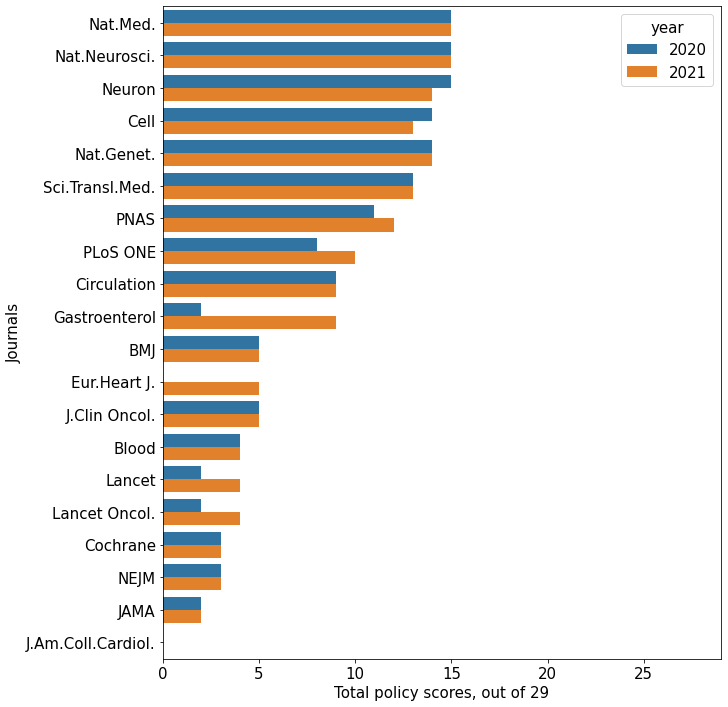

In [14]:
# plotting the grand total score (TOP 8 + 3 extras) for 2020 & 2021, score out of 29 
plt.figure(figsize=(10,12))
sns.set_color_codes("colorblind")
ax = sns.barplot(data=df2, x="grand_total", y="Journal", hue="year")
plt.xlabel('Total policy scores, out of 29', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Journals', fontsize=15)
plt.legend(title='year', title_fontsize=15, fontsize=15)
degrees=0
plt.yticks(fontsize=15, rotation=degrees)
ax.set(xlim=(0, 29))

plt.savefig("fig_totalTOP_20-21.png", dpi=600)

# Analysis of TOP guidelines, 8 standards 

In [15]:
# descriptive stats for total TOP score (8 standards), out of 24
df1.groupby('year', as_index=False).agg({"TOP_8": "describe"})

year TOP_8                                            
        count  mean       std  min  25%  50%    75%   max
0  2020  20.0  6.45  5.286278  0.0  2.0  4.5  12.25  14.0
1  2021  20.0  7.25  4.643898  0.0  4.0  6.0  12.00  14.0

In [16]:
table=pd.pivot_table(df1,index='Journal',columns='year',values='TOP_8',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,4,4,0
Blood,4,4,0
Cell,13,12,-1
Circulation,8,8,0
Cochrane,1,1,0
Eur.Heart J.,0,5,5
Gastroenterol,2,9,7
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,5,5,0


In [17]:
# sorting the order of the journals 
df3 = df1.sort_values(by=['TOP_8', 'Journal'],
                      ascending=[False, True])
df3.head()

,Journal,year,Data citation,Data transparency,Code transparency,Materials transparency,Design & analysis,Study prereg,Analysis prereg,Replication,...,Reg reports,OS badges,COI1,COI2,COI3,COI4,grand_total,extra_total,TOP_8,COI_total
26,Nat.Med.,2020,2,2,3,2,2,1,1,1,...,0,0,1,1,1,1,15,1,14,4
27,Nat.Med.,2021,2,2,3,2,2,1,1,1,...,0,0,1,1,1,1,15,1,14,4
28,Nat.Neurosci.,2020,2,2,3,2,2,1,1,1,...,0,0,1,1,1,1,15,1,14,4
29,Nat.Neurosci.,2021,2,2,3,2,2,1,1,1,...,0,0,1,1,1,1,15,1,14,4
32,Neuron,2020,2,2,3,2,2,1,1,1,...,0,0,1,1,1,0,15,1,14,3


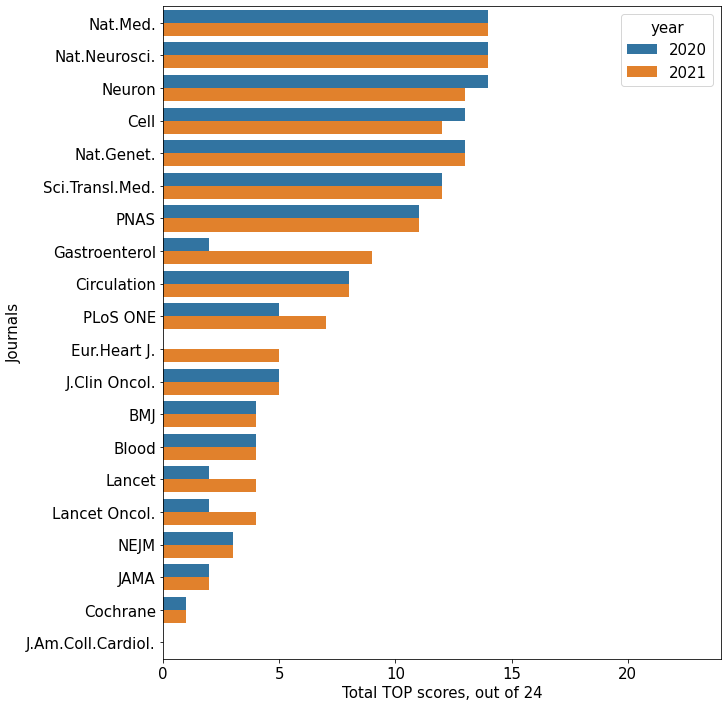

In [19]:
# plotting the total TOP score for 2020 & 2021

plt.figure(figsize=(10,12))
sns.set_color_codes("colorblind")
ax = sns.barplot(data=df3, x="TOP_8", y="Journal", hue="year")
plt.xlabel('Total TOP scores, out of 24', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Journals', fontsize=15)
plt.legend(title='year', title_fontsize=15, fontsize=15)
degrees=0
plt.yticks(fontsize=15, rotation=degrees)
ax.set(xlim=(0, 24))

plt.savefig("fig_TOP_20-21.png", dpi=600)

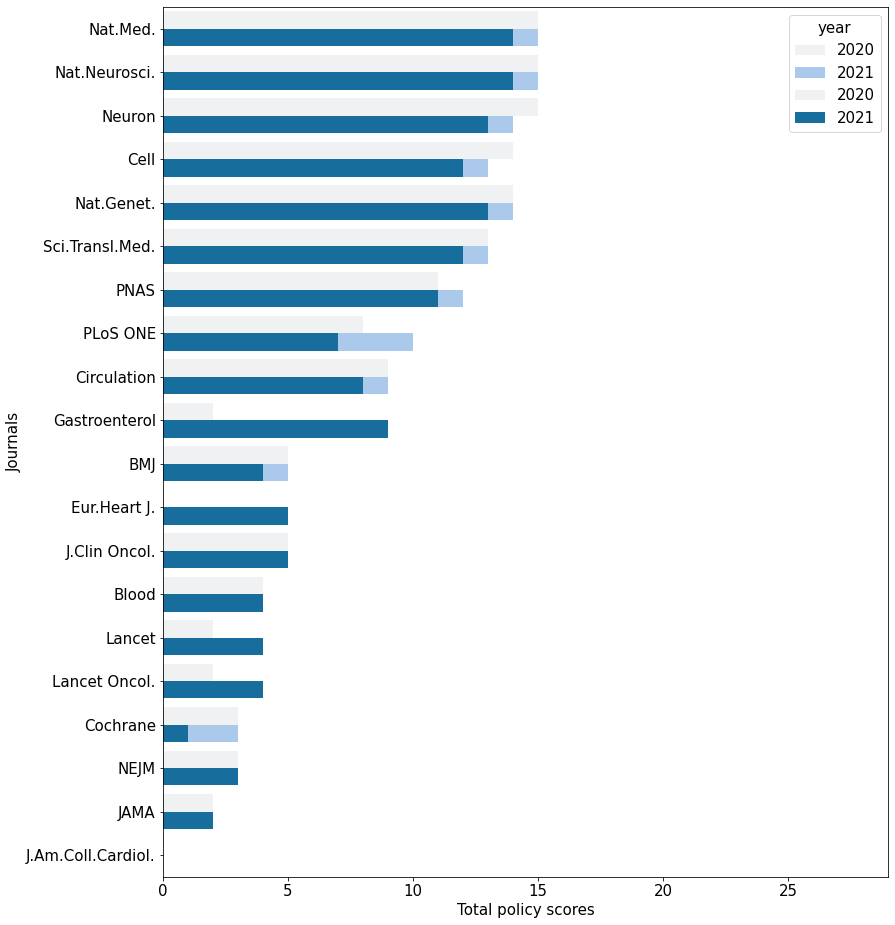

In [20]:
f, ax = plt.subplots(figsize=(13, 16))

# Plot grand total
sns.set_color_codes("pastel")
sns.barplot(data=df2, x="grand_total", y="Journal", hue="year", color="b")

# Plot TOP 8 standards
sns.set_color_codes("colorblind")
sns.barplot(data=df2, x="TOP_8", y="Journal", hue="year", color="b")

# Add a legend and informative axis label
ax.set(xlim=(0, 29))
degrees=0
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=degrees)
plt.ylabel('Journals', fontsize=15)
plt.xlabel("Total policy scores", fontsize=15)
plt.legend(title='year', title_fontsize=15, fontsize=15)

plt.savefig("TOPcombined_20-21.png", dpi=600)

# Descriptive stats for each measure of TOP standards 

In [21]:
# Citation summary - a score out of 0 to 3 
df1.groupby('year', as_index=False).agg({"Data citation": "describe"})

year Data citation                                         
                count  mean       std  min  25%  50%  75%  max
0  2020          20.0  0.75  0.910465  0.0  0.0  0.0  2.0  2.0
1  2021          20.0  0.95  0.944513  0.0  0.0  1.0  2.0  2.0

In [22]:
# difference in citation scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Data citation',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,0,0,0
Blood,0,0,0
Cell,2,2,0
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,2,2
Gastroenterol,0,2,2
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


In [23]:
# Data transparency summary - a score out of 0 to 3 
df1.groupby('year', as_index=False).agg({"Data transparency": "describe"})

year Data transparency                                         
                    count  mean       std  min  25%  50%  75%  max
0  2020              20.0  1.15  0.875094  0.0  0.0  1.0  2.0  2.0
1  2021              20.0  1.30  0.732695  0.0  1.0  1.0  2.0  2.0

In [24]:
# difference in Data transparency scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Data transparency',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,1,1,0
Blood,2,2,0
Cell,2,2,0
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,1,1
Gastroenterol,1,1,0
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,1,1,0


In [25]:
# Analystic methods (code) summary - a score out of 0 to 3 
df1.groupby('year', as_index=False).agg({"Code transparency": "describe"})

year Code transparency                                         
                    count  mean       std  min  25%  50%  75%  max
0  2020              20.0  1.05  1.276302  0.0  0.0  0.0  2.0  3.0
1  2021              20.0  1.10  1.071153  0.0  0.0  1.0  2.0  3.0

In [26]:
# difference in Analytical methods (code) scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Code transparency',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,0,0,0
Blood,0,0,0
Cell,3,2,-1
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,1,1
Gastroenterol,0,1,1
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,2,2,0


In [27]:
# Materials summary - a score out of 0 to 3 
df1.groupby('year', as_index=False).agg({"Materials transparency": "describe"})

year Materials transparency                                          
                         count  mean       std  min   25%  50%  75%  max
0  2020                   20.0  1.00  0.917663  0.0  0.00  1.0  2.0  2.0
1  2021                   20.0  1.15  0.812728  0.0  0.75  1.0  2.0  2.0

In [28]:
# difference in Materials scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Materials transparency',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,0,0,0
Blood,2,2,0
Cell,1,1,0
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,1,1
Gastroenterol,1,1,0
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,2,2,0


In [29]:
# Design & analysis summary - a score out of 0 to 3
df1.groupby('year', as_index=False).agg({"Design & analysis": "describe"})

year Design & analysis                                          
                    count  mean       std  min   25%  50%  75%  max
0  2020              20.0  1.20  0.833509  0.0  0.75  1.0  2.0  2.0
1  2021              20.0  1.25  0.786398  0.0  1.00  1.0  2.0  2.0

In [30]:
# difference in Design & analysis scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Design & analysis',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,2,2,0
Blood,0,0,0
Cell,2,2,0
Circulation,1,1,0
Cochrane,1,1,0
Eur.Heart J.,0,0,0
Gastroenterol,0,1,1
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


In [31]:
# Study prereg summary - a score out of 0 to 3 
df1.groupby('year', as_index=False).agg({"Study prereg": "describe"})

year Study prereg                                         
               count  mean       std  min  25%  50%  75%  max
0  2020         20.0  0.45  0.510418  0.0  0.0  0.0  1.0  1.0
1  2021         20.0  0.50  0.512989  0.0  0.0  0.5  1.0  1.0

In [32]:
# difference in Study prereg scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Study prereg',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,1,1,0
Blood,0,0,0
Cell,1,1,0
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,0,0
Gastroenterol,0,1,1
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


In [33]:
# Analysis prereg summary - a score out of 0 to 3 
df1.groupby('year', as_index=False).agg({"Analysis prereg": "describe"})

year Analysis prereg                                         
                  count  mean       std  min  25%  50%  75%  max
0  2020            20.0  0.45  0.510418  0.0  0.0  0.0  1.0  1.0
1  2021            20.0  0.50  0.512989  0.0  0.0  0.5  1.0  1.0

In [34]:
# difference in Analysis prereg scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Analysis prereg',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,0,0,0
Blood,0,0,0
Cell,1,1,0
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,0,0
Gastroenterol,0,1,1
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


In [35]:
# Replication summary - a score out of 0 to 3 
df1.groupby('year', as_index=False).agg({"Replication": "describe"})

year Replication                                        
              count mean       std  min  25%  50%  75%  max
0  2020        20.0  0.4  0.502625  0.0  0.0  0.0  1.0  1.0
1  2021        20.0  0.5  0.512989  0.0  0.0  0.5  1.0  1.0

In [36]:
# difference in Replication scores 
table=pd.pivot_table(df1,index='Journal',columns='year',values='Replication',aggfunc='mean')
table['diff']=table[2021]-table[2020]
table

year,2020,2021,diff
Journal,,,
BMJ,0,0,0
Blood,0,0,0
Cell,1,1,0
Circulation,1,1,0
Cochrane,0,0,0
Eur.Heart J.,0,0,0
Gastroenterol,0,1,1
J.Am.Coll.Cardiol.,0,0,0
J.Clin Oncol.,0,0,0


# Analysis of COI scores from the International Committee of Medical Journal Editors (ICMJE) disclosure form 

In [37]:
# descriptive stats for COI total score, out of 4
df1.groupby('year', as_index=False).agg({"COI_total": "describe"})

year COI_total                                         
            count  mean       std  min  25%  50%  75%  max
0  2020      20.0  3.85  0.366348  3.0  4.0  4.0  4.0  4.0
1  2021      20.0  3.95  0.223607  3.0  4.0  4.0  4.0  4.0

In [38]:
# sorting the order of the journals 
df4 = df1.sort_values(by=['COI_total', 'Journal'],
                      ascending=[False, True])
df4.head()

,Journal,year,Data citation,Data transparency,Code transparency,Materials transparency,Design & analysis,Study prereg,Analysis prereg,Replication,...,Reg reports,OS badges,COI1,COI2,COI3,COI4,grand_total,extra_total,TOP_8,COI_total
2,BMJ,2020,0,1,0,0,2,1,0,0,...,0,0,1,1,1,1,5,1,4,4
3,BMJ,2021,0,1,0,0,2,1,0,0,...,0,0,1,1,1,1,5,1,4,4
0,Blood,2020,0,2,0,2,0,0,0,0,...,0,0,1,1,1,1,4,0,4,4
1,Blood,2021,0,2,0,2,0,0,0,0,...,0,0,1,1,1,1,4,0,4,4
6,Circulation,2020,1,1,1,1,1,1,1,1,...,0,0,1,1,1,1,9,1,8,4


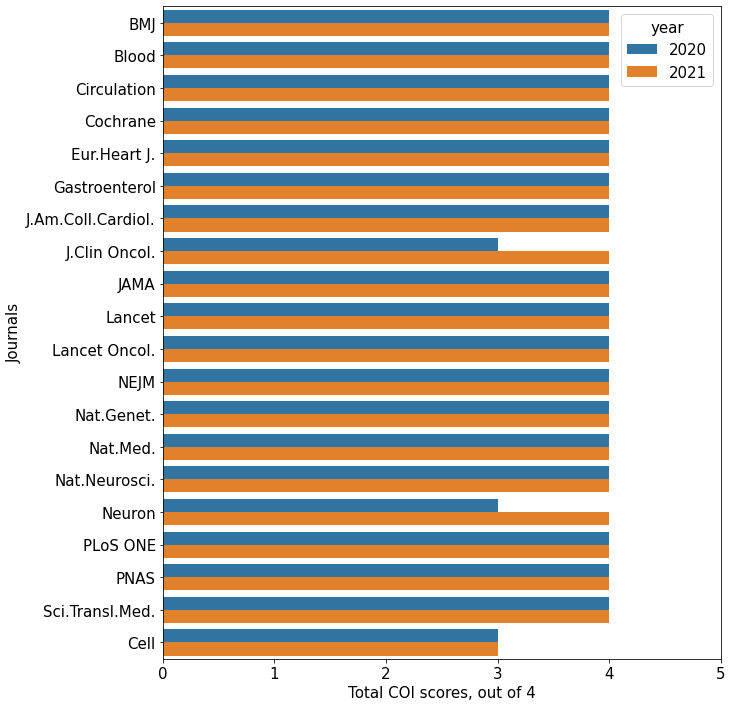

In [39]:
# plotting the total COI score for 2020 & 2021, out of 4 points 

plt.figure(figsize=(10,12))
sns.set_color_codes("colorblind")
ax = sns.barplot(data=df4, x="COI_total", y="Journal", hue="year")
plt.xlabel('Total COI scores, out of 4', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel('Journals', fontsize=15)
plt.legend(title='year', title_fontsize=15, fontsize=15)
degrees=0
plt.yticks(fontsize=15, rotation=degrees)
ax.set(xlim=(0, 5))

plt.savefig("fig_COI_20-21.png", dpi=600)

# Figures for 2020 scores

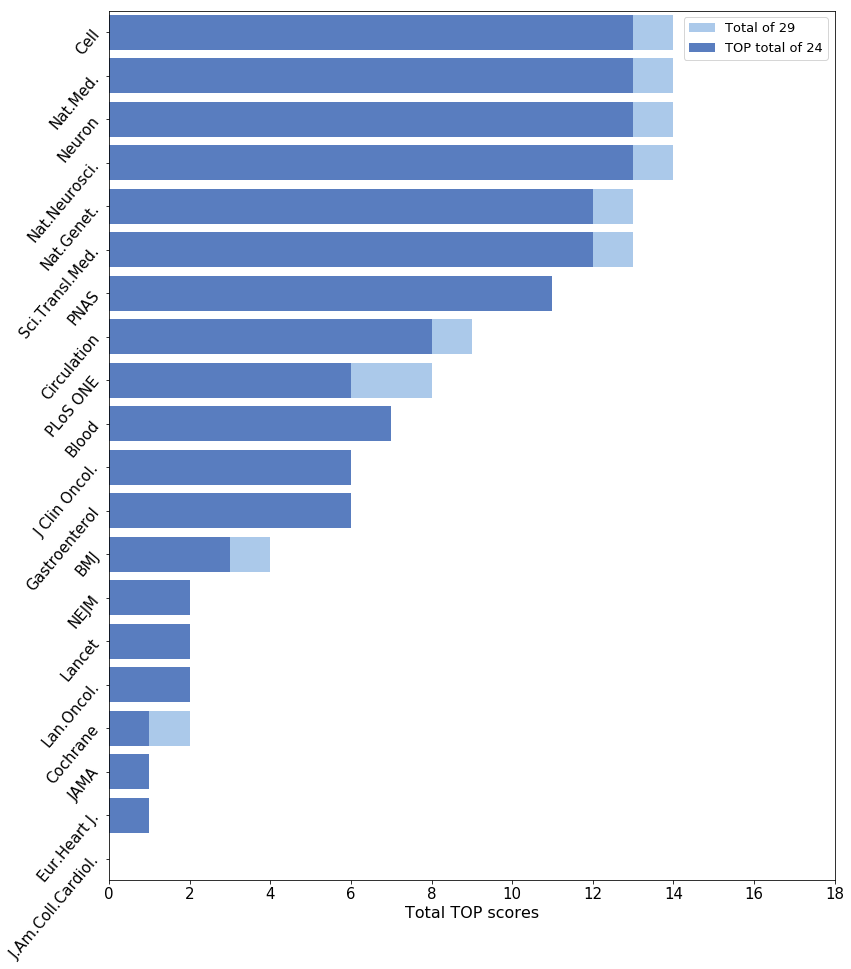

In [8]:
# for 2020: plotting the grand total score (TOP 8 + 3 extras), out of a possible 29 points 

f, ax = plt.subplots(figsize=(13, 16))

# Plot grand total
sns.set_color_codes("pastel")
sns.barplot(x="grand_total", y="Journal", data=df,
            label="Total of 29", color="b")

# Plot TOP 8 standards
sns.set_color_codes("muted")
sns.barplot(x="TOP_8", y="Journal", data=df,
            label="TOP total of 24", color="b")

# Add a legend and informative axis label
ax.legend(ncol=1, loc="upper right", frameon=True, fontsize=13)
ax.set(xlim=(0, 18), 
       ylabel="")

degrees=50
plt.xticks(fontsize=15)
plt.yticks(fontsize=15, rotation=degrees)
plt.xlabel("Total TOP scores", fontsize=16)

plt.savefig("fig1_totalTOPcombined.png", dpi=600)

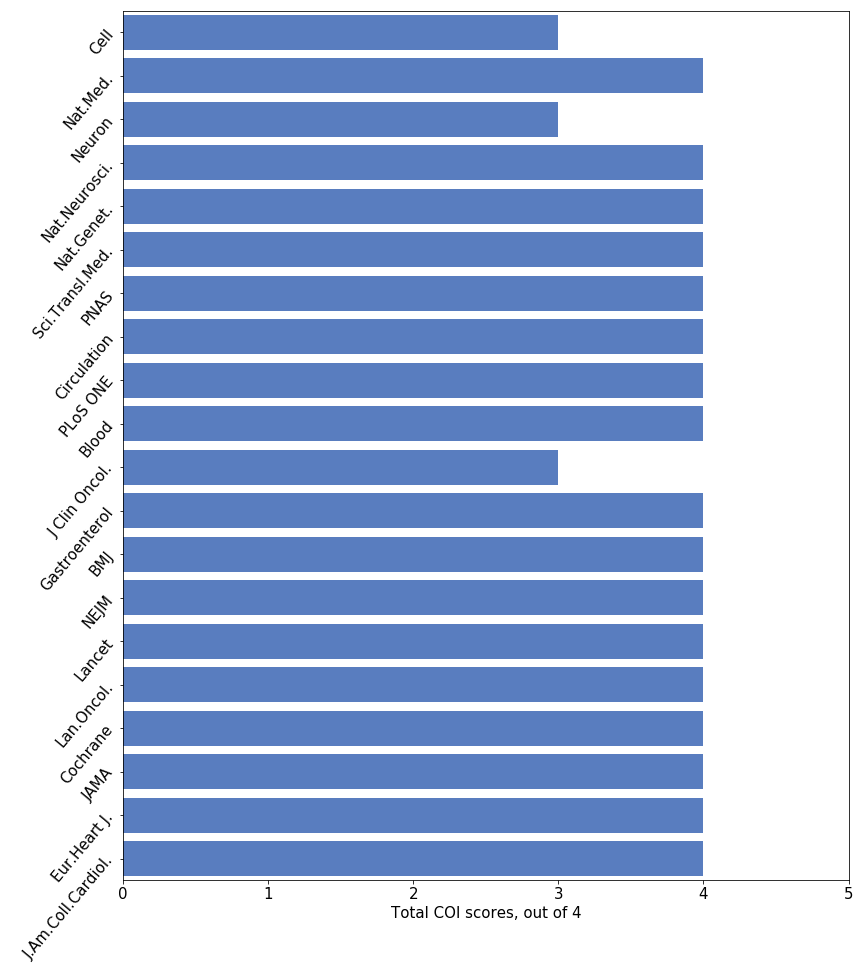

In [9]:
# plotting the total COI scores for 2020, score out of 4 

plt.figure(figsize=(13,16))
sns.set_color_codes("muted")
ax = sns.barplot(data=df, x="COI_total", y="Journal", color="b")
plt.xlabel('Total COI scores, out of 4', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(' ')
degrees=50
plt.yticks(fontsize=15, rotation=degrees)
ax.set(xlim=(0, 5))

plt.savefig("fig2_COI.png", dpi=600)

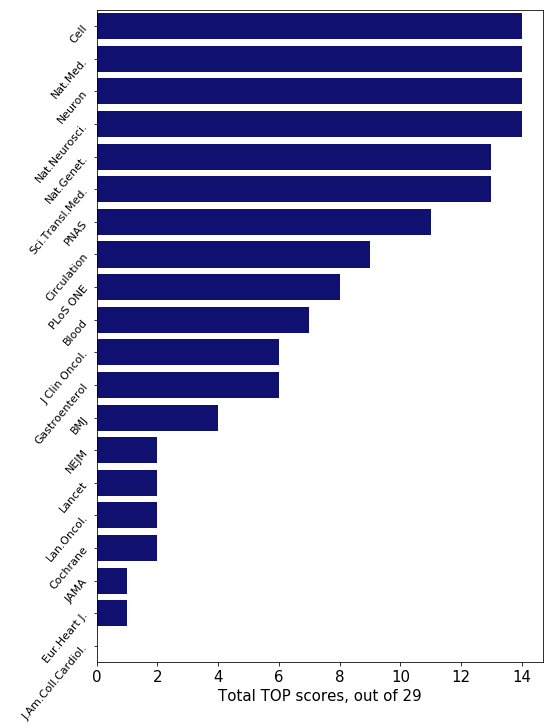

In [13]:
# plotting the grand total score (TOP 8 + 3 extras) for 2020, total out of 29 

plt.figure(figsize=(8,12))
ax = sns.barplot(data=df, x="grand_total", y="Journal", color="navy")
plt.xlabel('Total TOP scores, out of 29', fontsize=15)
plt.xticks(fontsize=15)
plt.ylabel(' ')
degrees=50
plt.yticks(fontsize=11, rotation=degrees)

plt.savefig("fig1_totalTOP.png", dpi=600)